**Delta Lake with Pandas**

Github: https://github.com/leslliesayrus/owshq-pandas-delta-live

LinkdIn: https://www.linkedin.com/in/rodrigo-bigdata/

# Install the deltalake library

I create a folder (lake) for write and read our files, so I download the csv files from Github and copy the csv from Github repository and paste into the Lake folder

In [1]:
!pip install deltalake # install the python library for delta
!mkdir /lake # create a directory call lake
!git clone https://github.com/leslliesayrus/owshq-pandas-delta-live.git # take the data from github
!cp -r /content/owshq-pandas-delta-live/data /lake # copy csv files into the lake folder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 63.9 MB/s eta 0:00:00
Cloning into 'owshq-pandas-delta-live'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 45 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (45/45), 10.25 KiB | 1.71 MiB/s, done.
Resolving deltas: 100% (7/7), done.


It's the commands for install the Apache Spark 3.3.1 into the Google Colab

In [ ]:
# Installing Apache Spark into Google Colab
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar xf spark-3.3.1-bin-hadoop3.tgz
!pip -q install findspark

# Introduction to Pandas

Importing the libraries pandas and deltalake

In [2]:
import pandas as pd
from deltalake import DeltaTable
from deltalake.writer import write_deltalake
import deltalake

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df = pd.read_csv("/lake/data/data_1.csv")

How to read a csv file, Pandas has the options for read parquet, excel, json, and html.

`head()` show the 5 first lines of the dataframe

In [ ]:
df.head()

,id,name,city,age,salary,score
0,1,James Stewart,Las Vegas,56,4530,490
1,2,Alejandro Barrett,Las Vegas,52,4734,422
2,3,Jim Evans,New York,46,2171,188
3,4,Tina Kirk,Los Angeles,26,3531,900
4,5,Morgan Bailey,Las Vegas,21,1617,202


Number of rows and columns:

In [ ]:
df.shape

(10, 6)

`describe()` makes a statistical analysis for all numeric columns of the dataframe (it's like mean, median, standard deviation, count, min and max)


In [ ]:
df.describe()

,id,age,salary,score
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,41.500000,3453.400000,433.700000
std,3.02765,15.042532,1124.941302,221.185217
min,1.00000,21.000000,1617.000000,188.000000
25%,3.25000,28.250000,2529.500000,236.750000
50%,5.50000,40.500000,3666.000000,438.500000
75%,7.75000,55.000000,4424.250000,541.750000
max,10.00000,62.000000,4734.000000,900.000000


`corr()` makes a correlation matrix



In [ ]:
df.corr()

<ipython-input-55-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,age,salary,score
id,1.000000,-0.320816,-0.196814,-0.118715
age,-0.320816,1.000000,0.341371,-0.138305
salary,-0.196814,0.341371,1.000000,0.483030
score,-0.118715,-0.138305,0.483030,1.000000


How visualize a specific column

In [ ]:
df['age']

0    56
1    52
2    46
3    26
4    21
5    62
6    35
7    58
8    27
9    32
Name: age, dtype: int64

How to make mathematics operation with columns

In [ ]:
df['age'] * 2

0    27440
1    21944
2     8648
3    23400
4     4242
5    36828
6    15925
7    12180
8    15093
9    10144
dtype: int64

To create a new column:

In [ ]:
df['new_column'] = df['age'] * df['salary']

To drop a column

In [ ]:
df = df.drop("new_column", axis = 1)

Group by like SQL queries:

In [ ]:
df.groupby("city")['salary'].mean()

city
Las Vegas      3575.857143
Los Angeles    3531.000000
New York       2986.000000
Name: salary, dtype: float64

Count unique values of the table:

In [ ]:
df['city'].value_counts()

Las Vegas      7
New York       2
Los Angeles    1
Name: city, dtype: int64

Case when in Pandas:

In [ ]:
df.loc[df['score'] <= 300, 'range_scores'] = 'low'
df.loc[df['score'] <= 700, 'range_scores'] = 'medium'
df.loc[df['score'] > 700, 'range_scores'] = 'high'

In [ ]:
df.head()

,id,name,city,age,salary,score,range_scores
0,1,James Stewart,Las Vegas,56,4530,490,medium
1,2,Alejandro Barrett,Las Vegas,52,4734,422,medium
2,3,Jim Evans,New York,46,2171,188,medium
3,4,Tina Kirk,Los Angeles,26,3531,900,high
4,5,Morgan Bailey,Las Vegas,21,1617,202,medium


In [ ]:
df = df.drop("range_scores", axis = 1)

# Delta tables with Pandas

Tranform "New York" in "new_york" to create a column that will be used to partition our delta table. Partitioning the table by the city column means that when saving the table in delta format, all New York city records will be saved in the same directory, a directory will be created for each city. It's possible partition with more than one column.

In [5]:
df['city_partition'] = df['city'].str.lower().str.replace(' ', '_')

Writing a pandas DataFrame in Delta:
We set the path of the delta table, the pandas dataframe for writing, description and partition it's not necessary. We can set the mode too, for example `mode = 'append'`, `mode = 'overwrite'`. Append acrescentig new data for the table and overwrite rewrite, replace the table.

In [6]:
write_deltalake('/lake/delta_table', df,
                description= 'dataframe created to demonstraction of Delta table with Pandas',
                partition_by= ['city_partition'])

Reading a Delta Table with Pandas:

In [7]:
import datetime

In [21]:
dataframe = DeltaTable('/lake/delta_table').to_pandas()
# dataframe.set_index('id', inplace = True)
dataframe.head()

0:00:00.145237


Reading a delta table with partition filter

In [ ]:
DeltaTable('/lake/delta_table').to_pandas(
    partitions=[("city_partition", 'in', ["new_york"])])

,id,name,city,age,salary,score,city_partition
0,3,Jim Evans,New York,46,2171,188,new_york
1,10,Keith Thompson,New York,32,3801,317,new_york


# Metadata

The delta stores the metadata of the table into the json file. Information like path, count, min and max of the columns, versions, timestamp, operations and more.

In [ ]:
print(DeltaTable('/lake/delta_table').metadata())

Metadata(id: 7607feca-4ee5-4056-bd57-a134b0b9cc63, name: None, description: dataframe created to demonstraction of Delta table with Pandas, partition_columns: ['city_partition'], created_time: 1692066230757, configuration: {})


In [ ]:
DeltaTable('/lake/delta_table').schema().to_pyarrow()

id: int64
name: string
city: string
age: int64
salary: int64
score: int64
city_partition: string

In [ ]:
DeltaTable('/lake/delta_table').history()

[{'timestamp': 1692066230757,
  'operation': 'CREATE TABLE',
  'operationParameters': {'metadata': '{"configuration":{},"created_time":1692066230757,"description":"dataframe created to demonstraction of Delta table with Pandas","format":{"options":{},"provider":"parquet"},"id":"7607feca-4ee5-4056-bd57-a134b0b9cc63","name":null,"partition_columns":["city_partition"],"schema":{"fields":[{"metadata":{},"name":"id","nullable":true,"type":"long"},{"metadata":{},"name":"name","nullable":true,"type":"string"},{"metadata":{},"name":"city","nullable":true,"type":"string"},{"metadata":{},"name":"age","nullable":true,"type":"long"},{"metadata":{},"name":"salary","nullable":true,"type":"long"},{"metadata":{},"name":"score","nullable":true,"type":"long"},{"metadata":{},"name":"city_partition","nullable":true,"type":"string"}],"type":"struct"}}',
   'location': 'file:///lake/delta_table',
   'protocol': '{"minReaderVersion":1,"minWriterVersion":1}',
   'mode': 'ErrorIfExists'},
  'clientVersion': 'd

This function show all metadata of the table with a Pandas DataFrame.

In [ ]:
DeltaTable('/lake/delta_table').get_add_actions(flatten=True).to_pandas()

,path,size_bytes,modification_time,data_change,partition.city_partition,num_records,null_count.id,min.id,max.id,null_count.name,min.name,max.name,null_count.city,min.city,max.city,null_count.age,min.age,max.age,null_count.salary,min.salary,max.salary,null_count.score,min.score,max.score
0,city_partition=new_york/0-d74f8bf0-8f06-46c2-8...,4999,2023-08-15 02:23:50.736,True,new_york,2,0,3,10,0,Jim Evans,Keith Thompson,0,New York,New York,0,32,46,0,2171,3801,0,188,317
1,city_partition=las_vegas/0-d74f8bf0-8f06-46c2-...,5220,2023-08-15 02:23:50.747,True,las_vegas,7,0,1,9,0,Alejandro Barrett,Morgan Bailey,0,Las Vegas,Las Vegas,0,21,62,0,1617,4734,0,202,594
2,city_partition=los_angeles/0-d74f8bf0-8f06-46c...,4955,2023-08-15 02:23:50.756,True,los_angeles,1,0,4,4,0,Tina Kirk,Tina Kirk,0,Los Angeles,Los Angeles,0,26,26,0,3531,3531,0,900,900


# Time Travel

The Time Travel feature of Delta tables is incredible and we can use it in the Pandas. Always when the Delta table is changed, is created a new version of this table and we can travel through of the versions setting the version we want to access or state the table in a date specific, let's check out:

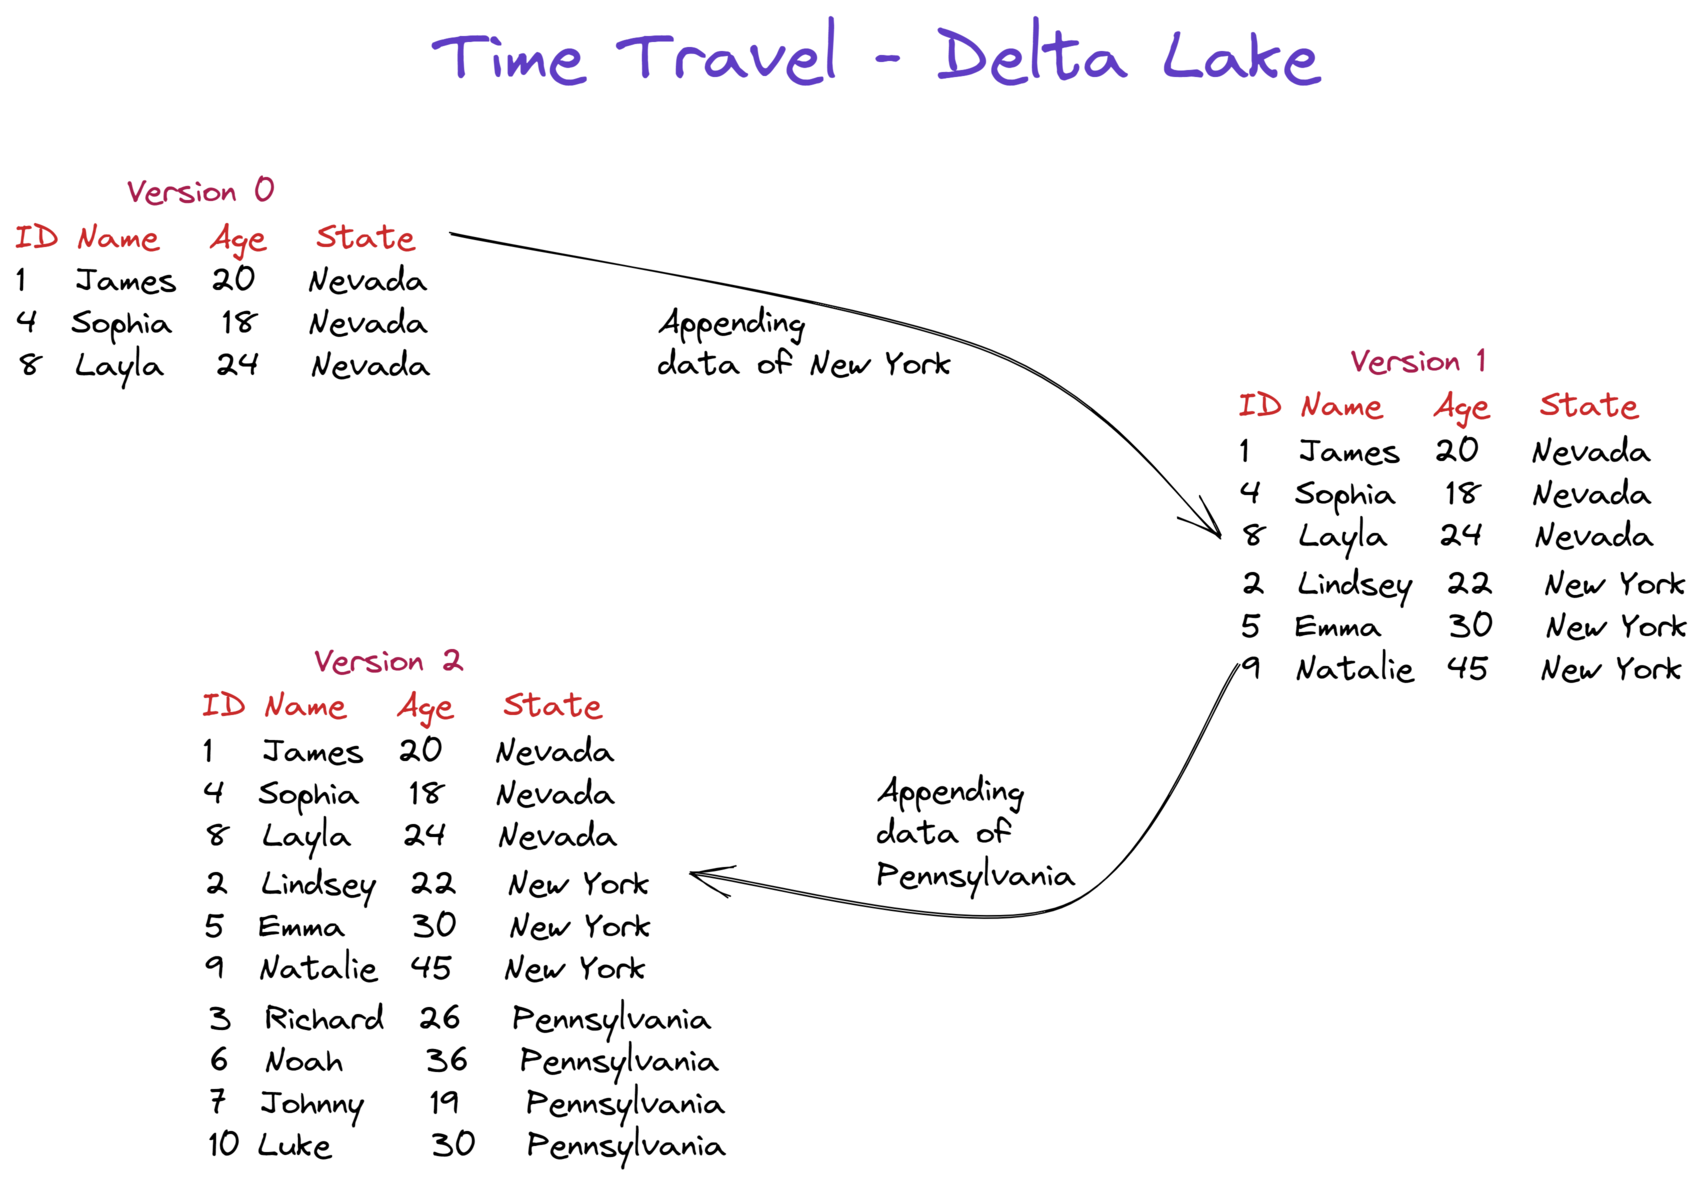

Adding new data into the table.

In [ ]:
df_02 = pd.read_csv("/lake/data/data_2.csv")
df_02['city_partition'] = df_02['city'].str.lower().str.replace(' ', '_')
df_02.shape

(10, 7)

In [ ]:
df_02.head(3)

,id,name,city,age,salary,score,city_partition
0,11,Dr. Roberta West MD,Las Vegas,43,3101,656,las_vegas
1,12,Cody Sanchez,New York,27,2262,665,new_york
2,13,Jill Williams,Las Vegas,35,4800,950,las_vegas


In [ ]:
write_deltalake('/lake/delta_table', df_02,
                mode = 'append',
                partition_by= ['city_partition'])

Reading the delta in a specific version:

In [ ]:
DeltaTable('/lake/delta_table', version = 0).to_pandas()

,name,city,age,city_partition
0,Jim Evans,New York,46,new_york
1,Keith Thompson,New York,32,new_york
2,James Stewart,Las Vegas,56,las_vegas
3,Alejandro Barrett,Las Vegas,52,las_vegas
4,Morgan Bailey,Las Vegas,21,las_vegas
5,David James,Las Vegas,62,las_vegas
6,Kelli Murphy,Las Vegas,35,las_vegas
7,Ashley Vasquez,Las Vegas,58,las_vegas
8,Lisa Bruce,Las Vegas,27,las_vegas
9,Tina Kirk,Los Angeles,26,los_angeles


Adding more data into the delta table.

In [ ]:
df_03 = pd.read_csv("/lake/data/data_3.csv")
df_03['city_partition'] = df_03['city'].str.lower().str.replace(' ', '_')
write_deltalake('/lake/delta_table', df_03,
                mode = 'append',
                partition_by= ['city_partition'])

To access the delta table with datetime, we use the attribute `load_with_datetime` and set the timestamp of the moment that you want to access.

This parameter accepts the timestamp style: RFC 3339 and SO 8601 \
You can see the examples on this site: https://www.utctime.net/

In [ ]:
df_time = DeltaTable('/lake/delta_table')
df_time.load_with_datetime('2023-08-14T02:30:11+00:00')
df_time = df_time.to_pandas()
df_time

,id,name,city,age,salary,score,city_partition
0,3,Jim Evans,New York,46,2171,188,new_york
1,10,Keith Thompson,New York,32,3801,317,new_york
2,1,James Stewart,Las Vegas,56,4530,490,las_vegas
3,2,Alejandro Barrett,Las Vegas,52,4734,422,las_vegas
4,5,Morgan Bailey,Las Vegas,21,1617,202,las_vegas
5,6,David James,Las Vegas,62,4107,594,las_vegas
6,7,Kelli Murphy,Las Vegas,35,4727,455,las_vegas
7,8,Ashley Vasquez,Las Vegas,58,2401,210,las_vegas
8,9,Lisa Bruce,Las Vegas,27,2915,559,las_vegas
9,4,Tina Kirk,Los Angeles,26,3531,900,los_angeles


In [ ]:
df_metadata = DeltaTable('/lake/delta_table').get_add_actions(flatten=True).to_pandas()

In [ ]:
df_metadata.head()

,path,size_bytes,modification_time,data_change,partition.city_partition,num_records,null_count.id,min.id,max.id,null_count.name,min.name,max.name,null_count.city,min.city,max.city,null_count.age,min.age,max.age,null_count.salary,min.salary,max.salary,null_count.score,min.score,max.score
0,city_partition=new_york/0-d74f8bf0-8f06-46c2-8...,4999,2023-08-15 02:23:50.736,True,new_york,2,0,3,10,0,Jim Evans,Keith Thompson,0,New York,New York,0,32,46,0,2171,3801,0,188,317
1,city_partition=las_vegas/0-d74f8bf0-8f06-46c2-...,5220,2023-08-15 02:23:50.747,True,las_vegas,7,0,1,9,0,Alejandro Barrett,Morgan Bailey,0,Las Vegas,Las Vegas,0,21,62,0,1617,4734,0,202,594
2,city_partition=los_angeles/0-d74f8bf0-8f06-46c...,4955,2023-08-15 02:23:50.756,True,los_angeles,1,0,4,4,0,Tina Kirk,Tina Kirk,0,Los Angeles,Los Angeles,0,26,26,0,3531,3531,0,900,900
3,city_partition=las_vegas/1-8736d75d-a010-432b-...,5147,2023-08-15 02:51:57.697,True,las_vegas,4,0,11,19,0,Dr. Roberta West MD,Michael Underwood,0,Las Vegas,Las Vegas,0,35,49,0,3101,4994,0,212,950
4,city_partition=new_york/1-8736d75d-a010-432b-a...,5095,2023-08-15 02:51:57.703,True,new_york,4,0,12,20,0,Cody Sanchez,Stephen Mcclure,0,New York,New York,0,20,61,0,2262,4876,0,301,665


# Schema Reiforcement

The Reiforcement Schema prevents data corruption, the delta table only allows appending new data with the same schema of the delta table.

We'll create a new person to add to our delta table, but we'll create with age column as a string to see the Reinforcement Schema feature.

In [ ]:
df_time.loc[0]=["Jim Evans",	"New York",	"46c",	"new_york"]

In [ ]:
df_time.head(3)

,name,city,age,city_partition
0,Jim Evans,New York,46c,new_york
1,Keith Thompson,New York,32,new_york
2,James Stewart,Las Vegas,56,las_vegas


In [ ]:
df_time.dtypes

name              object
city              object
age               object
city_partition    object
dtype: object

In [ ]:
write_deltalake('/lake/delta_table', df_time,
                mode = 'append',
                partition_by= ['city_partition'])

ArrowTypeError: ignored

In [ ]:
df_03['new_columns'] = df_03['age'] * 2
df_03.head(3)

,name,city,age,city_partition,new_columns
0,Cindy Taylor,Los Angeles,20,los_angeles,40
1,Megan Smith,New York,28,new_york,56
2,Jeffrey Rodriguez,Las Vegas,51,las_vegas,102


In [ ]:
write_deltalake('/lake/delta_table', df_03,
                mode = 'append',
                partition_by= ['city_partition'])

ValueError: ignored

# Changed Data Feed - CDF

With `file_uris()` we can take the paths of the parquet files of the a specific version of the delta table.

In [ ]:
DeltaTable("/lake/delta_table", version = 0).file_uris()

['/lake/delta_table/city_partition=new_york/0-676f86f9-db82-4990-a8c9-f1bb47d6526e-0.parquet',
 '/lake/delta_table/city_partition=las_vegas/0-676f86f9-db82-4990-a8c9-f1bb47d6526e-0.parquet',
 '/lake/delta_table/city_partition=los_angeles/0-676f86f9-db82-4990-a8c9-f1bb47d6526e-0.parquet']


To use CDF with Pandas we need to create two lists, one with all the paths of the parquet files of the current version of the table and the other list with the parquet files of the previous version of the table, so just get all the files **that are in the** version current **but not in the** previous version.

S

In [ ]:
currently_version = DeltaTable("/lake/delta_table").version()
currently_version

2

In [ ]:
penultimate_version = currently_version - 1
penultimate_version

1

In [ ]:
files_currently_version = DeltaTable("/lake/delta_table", version = currently_version).file_uris()
files_currently_version

['/lake/delta_table/city_partition=new_york/0-676f86f9-db82-4990-a8c9-f1bb47d6526e-0.parquet',
 '/lake/delta_table/city_partition=las_vegas/0-676f86f9-db82-4990-a8c9-f1bb47d6526e-0.parquet',
 '/lake/delta_table/city_partition=los_angeles/0-676f86f9-db82-4990-a8c9-f1bb47d6526e-0.parquet',
 '/lake/delta_table/city_partition=los_angeles/1-6e535ffa-3d29-4670-9055-c13bec1c9918-0.parquet',
 '/lake/delta_table/city_partition=new_york/1-6e535ffa-3d29-4670-9055-c13bec1c9918-0.parquet',
 '/lake/delta_table/city_partition=las_vegas/1-6e535ffa-3d29-4670-9055-c13bec1c9918-0.parquet',
 '/lake/delta_table/city_partition=new_york/2-c9aacef2-8798-4467-be1f-67bbb9a59af9-0.parquet',
 '/lake/delta_table/city_partition=los_angeles/2-c9aacef2-8798-4467-be1f-67bbb9a59af9-0.parquet',
 '/lake/delta_table/city_partition=las_vegas/2-c9aacef2-8798-4467-be1f-67bbb9a59af9-0.parquet']

In [ ]:
files_penultimate_version = DeltaTable("/lake/delta_table", version = penultimate_version).file_uris()
files_penultimate_version

['/lake/delta_table/city_partition=new_york/0-676f86f9-db82-4990-a8c9-f1bb47d6526e-0.parquet',
 '/lake/delta_table/city_partition=las_vegas/0-676f86f9-db82-4990-a8c9-f1bb47d6526e-0.parquet',
 '/lake/delta_table/city_partition=los_angeles/0-676f86f9-db82-4990-a8c9-f1bb47d6526e-0.parquet',
 '/lake/delta_table/city_partition=los_angeles/1-6e535ffa-3d29-4670-9055-c13bec1c9918-0.parquet',
 '/lake/delta_table/city_partition=new_york/1-6e535ffa-3d29-4670-9055-c13bec1c9918-0.parquet',
 '/lake/delta_table/city_partition=las_vegas/1-6e535ffa-3d29-4670-9055-c13bec1c9918-0.parquet']

In [ ]:
diferential_files = [i for i in files_currently_version if i not in files_penultimate_version]
diferential_files

['/lake/delta_table/city_partition=new_york/2-c9aacef2-8798-4467-be1f-67bbb9a59af9-0.parquet',
 '/lake/delta_table/city_partition=los_angeles/2-c9aacef2-8798-4467-be1f-67bbb9a59af9-0.parquet',
 '/lake/delta_table/city_partition=las_vegas/2-c9aacef2-8798-4467-be1f-67bbb9a59af9-0.parquet']

In [ ]:
df_differential = pd.read_parquet(diferential_files)
df_differential.head(3)

,name,city,age,city_partition
0,Megan Smith,New York,28,new_york
1,Carl Anthony,New York,29,new_york
2,Stephen Yang,New York,53,new_york


In [ ]:
def read_diffential(version_new, version_old):
  files_new_version = DeltaTable("/lake/delta_table", version = version_new).file_uris()
  files_old_version = DeltaTable("/lake/delta_table", version = version_old).file_uris()

  files = [i for i in files_new_version if i not in files_old_version]
  return files

In [ ]:
read_diffential(1,0)

['/lake/delta_table/city_partition=los_angeles/1-6e535ffa-3d29-4670-9055-c13bec1c9918-0.parquet',
 '/lake/delta_table/city_partition=new_york/1-6e535ffa-3d29-4670-9055-c13bec1c9918-0.parquet',
 '/lake/delta_table/city_partition=las_vegas/1-6e535ffa-3d29-4670-9055-c13bec1c9918-0.parquet']

# Tests with Apache Spark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [ ]:
import findspark
findspark.init()

In [ ]:
### import Spark libraries
from pyspark.sql import SparkSession
import pyspark.sql.functions as f

### spark package maven coordinates - in case you are loading more than just delta
spark_packages_list = [
    'io.delta:delta-core_2.12:2.2.0',
]
spark_packages = ",".join(spark_packages_list)

### SparkSession
spark = (
    SparkSession.builder
    .config("spark.jars.packages", spark_packages)
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension")
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")
    .getOrCreate()
)

In [ ]:
df_spark = spark.read.format("delta").load("/lake/delta_table")

In [ ]:
df_spark.show()

+-------------------+-----------+---+--------------+
|               name|       city|age|city_partition|
+-------------------+-----------+---+--------------+
|      James Stewart|  Las Vegas| 56|     las_vegas|
|  Alejandro Barrett|  Las Vegas| 52|     las_vegas|
|      Morgan Bailey|  Las Vegas| 21|     las_vegas|
|        David James|  Las Vegas| 62|     las_vegas|
|       Kelli Murphy|  Las Vegas| 35|     las_vegas|
|     Ashley Vasquez|  Las Vegas| 58|     las_vegas|
|         Lisa Bruce|  Las Vegas| 27|     las_vegas|
|Dr. Roberta West MD|  Las Vegas| 43|     las_vegas|
|      Jill Williams|  Las Vegas| 35|     las_vegas|
|  Michael Underwood|  Las Vegas| 49|     las_vegas|
|   Heather Guerrero|  Las Vegas| 44|     las_vegas|
|       Cody Sanchez|   New York| 27|      new_york|
|    Stephen Mcclure|   New York| 21|      new_york|
|       Debra Dawson|   New York| 20|      new_york|
|         Jared Bell|   New York| 61|      new_york|
|        Megan Smith|   New York| 28|      new

In [ ]:
df_spark.createOrReplaceTempView("df_spark")

In [ ]:
df_spark_01 = spark.sql("""
    select
      name, age, city_partition
    from
      df_spark
    where
      age < 22
""")

In [ ]:
df_spark_01.show(3)

+---------------+---+--------------+
|           name|age|city_partition|
+---------------+---+--------------+
|  Morgan Bailey| 21|     las_vegas|
|Stephen Mcclure| 21|      new_york|
|   Debra Dawson| 20|      new_york|
+---------------+---+--------------+
only showing top 3 rows



In [ ]:
df_spark_01.write.format("delta").partitionBy("city_partition").save("/lake/delta_table_2")

In [ ]:
DeltaTable('/lake/delta_table_2').to_pandas()

,name,age,city_partition
0,Morgan Bailey,21,las_vegas
1,Stephen Mcclure,21,new_york
2,Debra Dawson,20,new_york
3,Cindy Taylor,20,los_angeles


In [ ]:
# open delta using the versionAsOf
# df= spark.read.format('delta').option('versionAsOf', '0').load('/lake/delta')

In [ ]:
# adding duplicates data in the delta table and reading using Time Travel feature with timestampAsOf
# df = spark.read.format('delta').option('timestampAsOf', '2022-11-07 12:40').load('/lake/delta')

# Connections with AWS, Google Cloud and Azure storages

*  ***AWS***:

Example write and read file from s3 bucket:

In [ ]:
aws_keys = {"AWS_ACCESS_KEY_ID": "access key id",
                   "AWS_SECRET_ACCESS_KEY":"secret access key",
                   "AWS_REGION":"us-east-1",
                   'AWS_S3_ALLOW_UNSAFE_RENAME': 'true'}

In [ ]:
write_deltalake('s3://bucket-name/folder',
                pandas_dataframe,
                storage_options = aws_key)

In [ ]:
DeltaTable('s3://bucket-name/folder',
           storage_options = aws_key)



*   ***Google Cloud***

 - In the `storage_options` set the path of a file .json of credentials with permission to access Cloud Storage. \
 - You can create the credentials following this [tutorial](https://easyscreenocr.com/create-google-api-json-credential/amp/), the Google creates a file JSON with all information to access the Google Storage through the APIs.

**The image of json to access the Cloud Storage** \
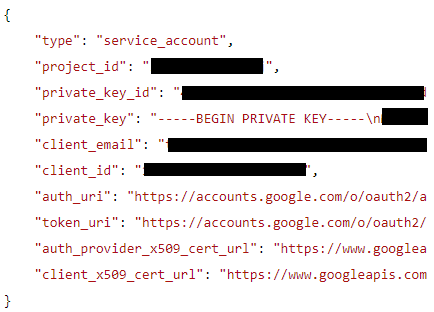 \
To read and write files from Cloud Storage:

In [ ]:
write_deltalake('gs://bucket-name/lake',
                df,
                storage_options = {'SERVICE_ACCOUNT':
                'path_file.json'})

In [ ]:
DeltaTable('gs://bucket-name/lake',
           storage_options={'SERVICE_ACCOUNT':'path_file.json'})

* ***Azure***

The path to files from accepted is: \
* az://container/path

* adl://container/path

* abfs://container/path

`storage_options`:

AZURE_STORAGE_ACCOUNT_NAME \
AZURE_STORAGE_CONNECTION_STRING \
AZURE_STORAGE_ACCOUNT_KEY

You can see the source code with all parameters [here](https://github.com/delta-io/delta-rs/blob/17999d24a58fb4c98c6280b9e57842c346b4603a/rust/src/builder.rs#L524-L539)